# ⚽ Expected vs. Reality: Is xG a True Predictor of Goals & Can Teams Use it to Gain Tactical Insight?---



## 🎯 3) Accuracy Analysis: Are We To Expect The Expected?

If the xG figure suggests a goal should be scored... does that mean we should expect one too? How much does the actual number of goals in a game vary from the expected value

And if at all, i is this simply down to the teams ability to convert chances? Or could patterns be identified to point toward a fundamental issue in how the figure is calculate

Before any further analysis into xG, it is crucial to first gain a relative level of assurance of accuracy. As without a reliable measure, any infrerments made as a consequence  would not be trusty.d.


### 1. Import Libraries

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### 2. Load the Cleaned Data

In [8]:
# Read the cleaned dataset generated from cleansing.py
df = pd.read_csv(r'C:\Users\d_par\OneDrive\Desktop\Danny\2025\Data Science\Portolio Projects\prem-xg-analysis\Data\cleaned_prem_data.csv')

# Convert infinite values to NaN to prevent warnings
df.replace([np.inf, -np.inf], np.nan, inplace=True)
print("Dataset Loaded Successfully")


display(df.head())

Dataset Loaded Successfully


,Day,Date,Time,Home,Home_xg,Score,Away_xg,Away,Home Rank,Away Rank,Home_Goals,Away_Goals,Home xg error,Away xg error,Total Goals,Total xG,xG - goals,Home Rank.1,Away Rank.1
0,Fri,2023-08-11,20:00,Burnley,0.3,0–3,1.9,Manchester City,19.0,1.0,0,3,0.3,-1.1,3,2.2,-0.8,19,1
1,Sun,2023-10-08,16:30,Arsenal,0.4,1–0,0.5,Manchester City,2.0,1.0,1,0,-0.6,0.5,1,0.9,-0.1,2,1
2,Wed,2023-12-27,20:15,Everton,1.0,1–3,2.4,Manchester City,15.0,1.0,1,3,0.0,-0.6,4,3.4,-0.6,15,1
3,Sun,2023-08-27,14:00,Sheffield Utd,0.7,1–2,3.5,Manchester City,20.0,1.0,1,2,-0.3,1.5,3,4.2,1.2,20,1
4,Thu,2024-04-25,20:00,Brighton,0.6,0–4,1.4,Manchester City,11.0,1.0,0,4,0.6,-2.6,4,2.0,-2.0,11,1


### 3. Summary Statistics for xG Error

In [10]:
# Print a summary of xG error directly

Total_Goals = df['Total Goals'].sum()
Total_xg = round((df['Home_xg'] + df['Away_xg']).sum(),2)

print('Total goals for the EPL 23/24 season: ' + str(Total_Goals))

print('While xG predicted a total of: ' + str(Total_xg))

print('The mean absolute xG error across all games is:',round(df['xG - goals'].abs().mean(),2))
print('The mean xG error across all games is:', round(df['xG - goals'].mean(),2))
print('The standard deviation of xG error is:', round(df['xG - goals'].std(),2))



Total goals for the EPL 23/24 season: 1246
While xG predicted a total of: 1178.2
The mean absolute xG error across all games is: 1.16
The mean xG error across all games is: -0.18
The standard deviation of xG error is: 1.45


## 🔑 Key Insights on xG Accuracy


### 📊 1️⃣ Overall xG Error
- **Mean Absolute xG Error:** **1.16**
- **Mean xG Error:** **0.18**

The average difference between xG and actual goals in a game, regardless of which was higher or lower is **1.16**. Yet the mean xG error is just **0.18**.

This reveals that while **xG predictions deviate by over a goal on average**, they tend to **balance out**, with overestimations and underestimations canceling each other out.  

🔹 The **slight negative bias** suggests that on average, **xG slightly underpredicts** the actual number of goals scored in a game .

---


### 📉 2️⃣ Variability in xG Predictions
- **Standard Deviation of xG Error:** **1.45**
  
The **xG errors show a relatively high variability** across games, with some matches showing **significant deviations**. Considering football matches of 2 goals or fewer are fairly common, a fluctuation of 1.45 goals is a large relative error.

📌 We can see the **distribution more clearly in the histogram below**:

### 4. Histogram of xG Error

The histogram below displays the distribution of xG errors.

The graph suggests **xG error is fairly normally distributed**, with values tightly clustered around zero. This suggests that predictions are generally accurate. 

However, we observe:
- A slight **left skew**, indicating that **xG is more likely to underestimate goals scored**.
- A **symmetrical curve**, meaning **overestimations and underestimations are fairly balanced**.
- **Extreme errors (beyond ±3) are rare**, reinforcing the reliability of xG for most matches.

C:\Users\d_par\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


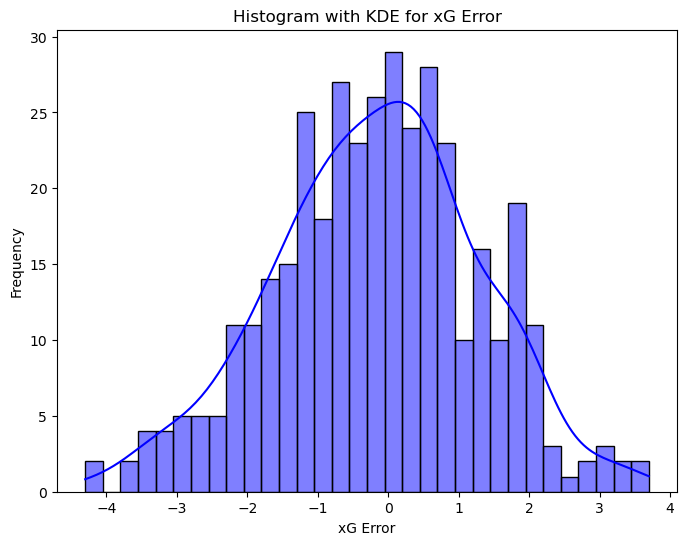

In [17]:
plt.figure(figsize=(8,6))
sns.histplot(df['xG - goals'], kde=True, binwidth=0.25, color='blue', edgecolor='black')
plt.title('Histogram with KDE for xG Error')
plt.xlabel('xG Error')
plt.ylabel('Frequency')
plt.show()

### ️ **Actionable Insights**
- 🧐 **Investigate Outliers**: Matches with **extreme deviations (>3)** should be examined for **patterns or anomalies**.

- 📊 **Model Refinements**: By analyzing these extreme cases, we can identify areas where the xG model performs well and where it struggles.


## **📌 Identifying High xG Errors**
A dataset was created containing all matches where **xG error exceeded 3**. 

In [21]:
# Identify High xG Error Fixtures

#filter to only include games incurring extreme xG errors.
High_error_fixtures = df[((df['xG - goals'] < -3) | ((df['xG - goals']) > 3))].reset_index()

#Display these anomolies to search for patterns.
display(High_error_fixtures[['Home','Home_Goals', 'Home_xg', 'Away', 'Away_Goals','Away_xg', 'Total Goals']])

,Home,Home_Goals,Home_xg,Away,Away_Goals,Away_xg,Total Goals
0,Burnley,2,1.3,Tottenham,5,2.2,7
1,Liverpool,0,2.3,Manchester Utd,0,0.8,0
2,Brighton,4,1.4,Crystal Palace,1,0.3,5
3,Liverpool,0,2.7,Crystal Palace,1,2.0,1
4,Crystal Palace,5,2.4,West Ham,2,1.3,7
5,Crystal Palace,3,1.1,Sheffield Utd,2,0.8,5
6,Fulham,0,1.6,Everton,0,1.9,0
7,Newcastle Utd,4,2.3,Luton Town,4,2.4,8
8,Everton,0,2.7,Fulham,1,1.5,1
9,Liverpool,4,2.1,Fulham,3,1.2,7


**Findings:**  

- The Dataset is made up **exclusively** of either very **high**, or **low** scoring games 
- This suggests that **xG struggles most in extreme goal-scoring situations**.

**Takeaways:**

- This further supports the **reliability of xG**, as larger errors in these games are likely driven by **particularly efficient finishing or wasteful chance conversion on the day**, rather than fundamental flaws in the model.



## **📊 Heatmap: Goals vs. xG Error**
To explore deeper into the relationship between **total goals in a match** and the **variation from expected xG**, the below heatmap visualises the data, where..

- 🎨 **Color intensity** represents the **number of fixtures** where a given xG error occurred.
- 🔥 **Darker blocks** indicate **more frequent occurrences** of specific xG errors.

C:\Users\d_par\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\d_par\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


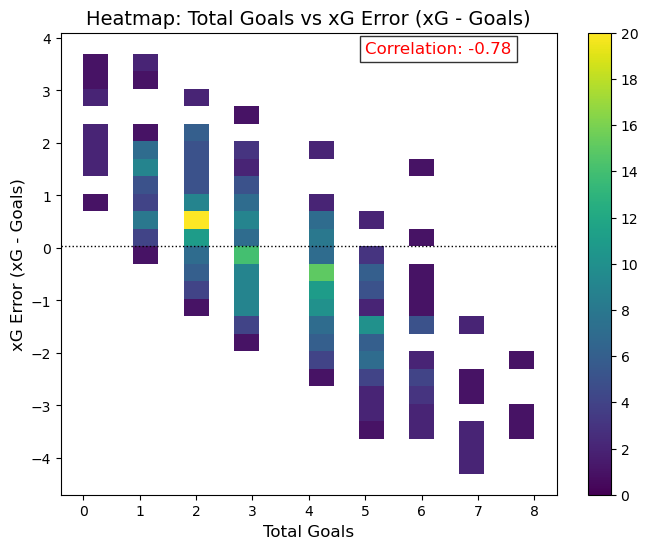

In [25]:
# Define custom bin edges for xG Error in increments of 1/3
xg_error_bins = np.arange(df['xG - goals'].min(), df['xG - goals'].max() + (1/3), 1/3)

# Calculate correlation between Total Goals and xG Error
correlation = df['Total Goals'].corr(df['xG - goals'])

plt.figure(figsize=(8, 6))
ax = sns.histplot(
    data=df,
    x='Total Goals',
    y='xG - goals',
    bins=[18, xg_error_bins],
    cmap='viridis',
    cbar=True
)

# Adjust the color bar to increments of 2
cbar = ax.collections[0].colorbar
cbar.set_ticks(np.arange(0, cbar.vmax + 2, 2))

# Add a horizontal dotted line at y = 0
plt.axhline(y=0.03, color='black', linestyle='dotted', linewidth=1)

# Add titles and labels
plt.title('Heatmap: Total Goals vs xG Error (xG - Goals)', fontsize=14)
plt.xlabel('Total Goals', fontsize=12)
plt.ylabel('xG Error (xG - Goals)', fontsize=12)

# Display correlation figure on the chart
plt.text(
    x=5,
    y=df['xG - goals'].max(),
    s=f"Correlation: {correlation:.2f}",
    fontsize=12,
    color='red',
    bbox=dict(facecolor='white', alpha=0.8)
)
plt.show()



## 🔑 Key Insights ##


### 📉 1️⃣ Correlation Between Total Goals & xG Error

- A **correlation of -0.78** suggests a **strong negative relationship** between **Total Goals** and **xG Error (xG - Goals)**.
- **Interpretation**:
  
  - The **more goals scored in a match, the more xG underestimates** the total goals.
    
  - The **fewer goals scored, the more xG overestimates** the total.
 ---
  
### ⚖️ 2️⃣  xG is Mostly Accurate, But Context Matters

- Matches with **3 goals** had the **smallest xG error**.
  
- In **games with 5+ goals**, xG **rarely overestimated**, implying that **high-scoring games are as a result clinical finishing rather than a wealth of chances**.
---

### 🛡️ 3️⃣ Reliability of xG & Other Factors to Consider?

- The clear pattern between goals and xG supports xG as a reliable metric. Large errors occuring mostly in extreme scoring games, likely reflect exceptional finishing—either clinical or wasteful—rather than flaws in xG itself.
---

### 🌍 4️⃣ Other Factors to Consider?

- Could **weather conditions or pitch quality** affect xG accuracy? Should this be taken into the calculations consideration?

- Lower leagues, where **pitch maintenance** is worse, may introduce more variance in finishing ability.

---

### Here we take a closer look at key summary statistics that highlight the relationship between match goals and expected goals (xG)


In [29]:
# Group the data by Total Goals
grouped = df.groupby('Total Goals')

# Calculate expanded statistics
summary_table = grouped.apply(lambda group: pd.Series({
    'Number of Games': int(len(group)),
    'Mean Absolute Error': round(group['xG - goals'].abs().mean(),2),
    'xG Error Standard Deviation': round(group['xG - goals'].std(),2),
    'Pct of Games |xG - Goals| > 1': (group['xG - goals'].abs() > 1).mean() * 100,
    'Underpredicted (%)': (group['xG - goals'] < 0).mean() * 100,  
    'Overpredicted (%)': (group['xG - goals'] > 0).mean() * 100, 
    'xG to Goal Ratio': round(group['Total xG'].sum() / group['Total Goals'].sum(),3) if group['Total Goals'].sum() != 0 else 'inf'
})).reset_index()

# Ensure integer formatting where appropriate
summary_table['Number of Games'] = summary_table['Number of Games'].astype(int)
summary_table['Pct of Games |xG - Goals| > 1'] = summary_table['Pct of Games |xG - Goals| > 1'].round().astype(int)
summary_table['Underpredicted (%)'] = summary_table['Underpredicted (%)'].round().astype(int)
summary_table['Overpredicted (%)'] = summary_table['Overpredicted (%)'].round().astype(int)

# Display the updated table
#import ace_tools as tools
#tools.display_dataframe_to_user(name="Enhanced xG Summary Statistics", dataframe=summary_table)

display(summary_table)


,Total Goals,Number of Games,Mean Absolute Error,xG Error Standard Deviation,Pct of Games |xG - Goals| > 1,Underpredicted (%),Overpredicted (%),xG to Goal Ratio
0,0,11,2.25,0.77,91,0,100,inf
1,1,42,1.31,0.85,60,2,98,2.307
2,2,81,0.86,0.88,28,20,78,1.342
3,3,80,0.75,0.93,30,54,42,0.999
4,4,80,0.87,0.88,34,71,24,0.851
5,5,50,1.49,0.92,66,92,4,0.711
6,6,23,2.02,1.21,87,91,9,0.689
7,7,10,3.10,0.99,100,100,0,0.557
8,8,3,2.90,0.61,100,100,0,0.638


# 🔹 Key Insights from xG Accuracy Analysis

✔ **xG is most accurate in 3-goal games (Mean Absolute Error = 0.75) & (xG to Goal Ratio = 0.99).** 

✔ **The lowest mean errors in the most common goal-scoring ranges (2, 3, 4) suggest xG is most reliable in typical matches. Larger errors in extreme scorelines however, may be due to limited data and increased variability.** 

✔ **In low-scoring games, (0-2 goals) xG overestimated over 78 % of the time**  

✔ **In high-scoring games (5+ goals) xG underestimated over 91% of the time.**  

✔ **The standard deviation of xG error is relatively consistent (around 0.8 - 0.9). 6 Goal games varied the most with a value of 1.2.** 

---

# 💭 Final Thought

✔ **The evidence gathered points toward that exceptional finishing—whether clinical or wasteful—drives the deviations in xG error. This reinforces xG as a reliable measure, as it implies errors stem from natural finishing variance rather than flaws in the model.**

# ⏭️ Transitioning to Performance Insights

The previous analysis confirmed that **xG is a reliable measure of expected goals**, showing strong predictive accuracy across different match scenarios.  

Now that we have established xG as a valid metric, the next step is to **explore its potential as a performance indicator**:  

✅ Can teams **use xG trends to evaluate their performances** beyond just final scorelines?  
✅ Does xG provide **actionable tactical insights** for improving attacking or defensive setups?  

In the next notebook, we will shift our focus from **prediction to application**, analyzing whether xG can help teams make **informed tactical adjustments** based on performance trends. 